<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">PROJET - Logement </h1>
</div>

**Votre tâche consiste à prédire les valeurs médianes des maisons dans les quartiers californiens, compte tenu d'un certain nombre de caractéristiques de ces les quartiers. (Pour une meilleure évaluation en utilisant "Pipeline", "Evaluation Cross-validation", "Grid search" ...**

Données : https://www.kaggle.com/camnugent/california-housing-prices

About this file

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import statsmodels.formula.api as smf
import itertools
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
try:
    from sklearn.utils._testing import ignore_warnings
except ImportError:
    from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from datetime import datetime
from os import getcwd
from mpl_toolkits.mplot3d import Axes3D
from joblib import dump, load
import matplotlib.image as mpimg
from function import *

In [3]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
verboseMain = False

print("Chargement des données...")
# Récupère le répertoire du programme
file_path = getcwd() + "\\"
file_path

Chargement des données...


'c:\\Users\\User\\WORK\\wokspace-simplon3\\simplon\\projets\\logement\\'

In [4]:
file_name = 'logement.csv'

df_origin = pd.read_csv(file_path+file_name, sep=',')

print("Chargement des données", df_origin.shape, ".... ...................................... END")

Chargement des données (20640, 10) .... ...................................... END


In [5]:
data= df_origin.copy()
target = 'median_house_value'

# 2. EDA (Exploratory Data Analysis)

1. Analyse de la forme :
   * Identification de la target
   * Nb lignes et Nb colonnes
   * Types de variables
   * Identification des Nan
1. Analyse du fond :
   * Visualisation de la target (histogramme / boxplot)
   * Compréhension des différentes variables (internet)
   * Visualisation des relations features - target (histogramme / boxplot)
   * Identification des outliers

In [6]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [7]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
data['ocean_proximity'] = data['ocean_proximity'].astype('category')
data.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

In [10]:
data.describe(include="all")

longitude      latitude  housing_median_age   total_rooms  \
count   20640.000000  20640.000000        20640.000000  20640.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.569704     35.631861           28.639486   2635.763081   
std         2.003532      2.135952           12.585558   2181.615252   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.800000     33.930000           18.000000   1447.750000   
50%      -118.490000     34.260000           29.000000   2127.000000   
75%      -118.010000     37.710000           37.000000   3148.000000   
max      -114.310000     41.950000           52.000000  39320.000000   

        total_bedrooms    population    households  median_income  \
count     20433.000000  20640.000000  20640.000000   20640.000000   
unique             NaN           NaN           NaN            NaN   
top                NaN           NaN           NaN            NaN   
freq               NaN           NaN           NaN            NaN   
mean        537.870553   1425.476744    499.539680       3.870671   
std         421.385070   1132.462122    382.329753       1.899822   
min           1.000000      3.000000      1.000000       0.499900   
25%         296.000000    787.000000    280.000000       2.563400   
50%         435.000000   1166.000000    409.000000       3.534800   
75%         647.000000   1725.000000    605.000000       4.743250   
max        6445.000000  35682.000000   6082.000000      15.000100   

        median_house_value ocean_proximity  
count         20640.000000           20640  
unique                 NaN               5  
top                    NaN       <1H OCEAN  
freq                   NaN            9136  
mean         206855.816909             NaN  
std          115395.615874             NaN  
min           14999.000000             NaN  
25%          119600.000000             NaN  
50%          179700.000000             NaN  
75%          264725.000000             NaN  
max          500001.000000             NaN

In [11]:
(data.isna().sum()/20640)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [12]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

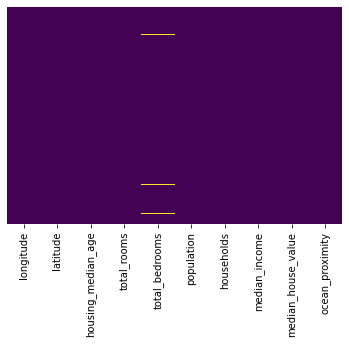

In [13]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [14]:
data[data['total_bedrooms'].isna()]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  
290          NEAR BAY  
341          NEAR BAY  
538          NEAR BAY  
563          NEAR BAY  
696          NEAR BAY  
...               ...  
20267      NEAR OCEAN  
20268      NEAR OCEAN  
20372       <1H OCEAN  
20460       <1H OCEAN  
20484       <1H OCEAN  

[207 rows x 10 columns]

In [15]:
sns.set_theme(style="ticks")
sns.pairplot(data, hue="ocean_proximity")

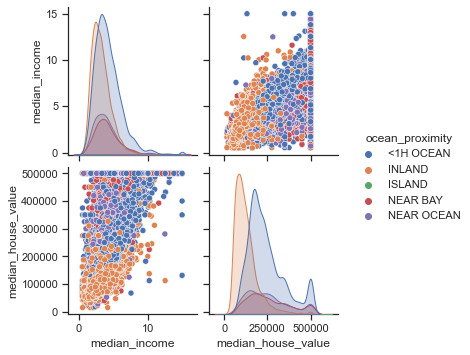

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(data[['median_income', 'median_house_value','ocean_proximity']], hue="ocean_proximity")

la barre fait penser à un plafonnement des prix à 500 000

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

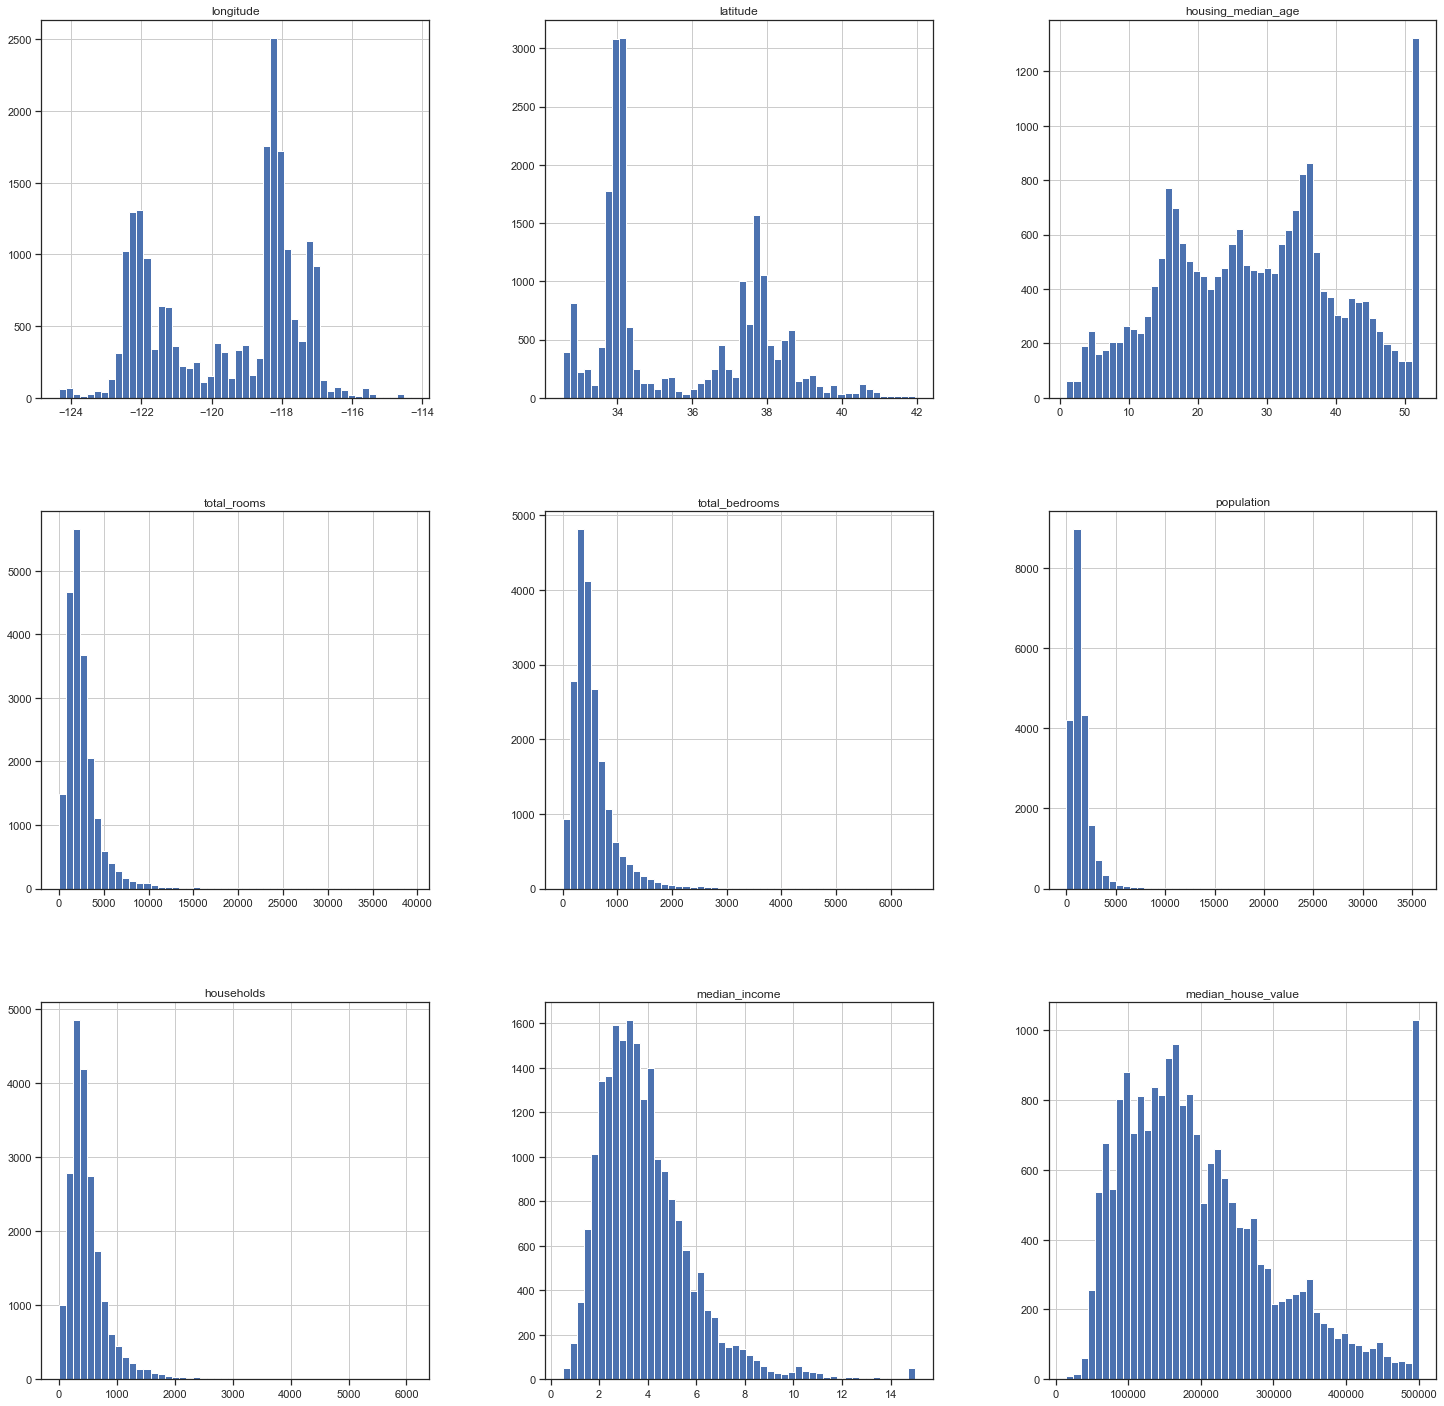

In [ ]:
data.hist(figsize=(25,25),bins=50)

CORR ------------------


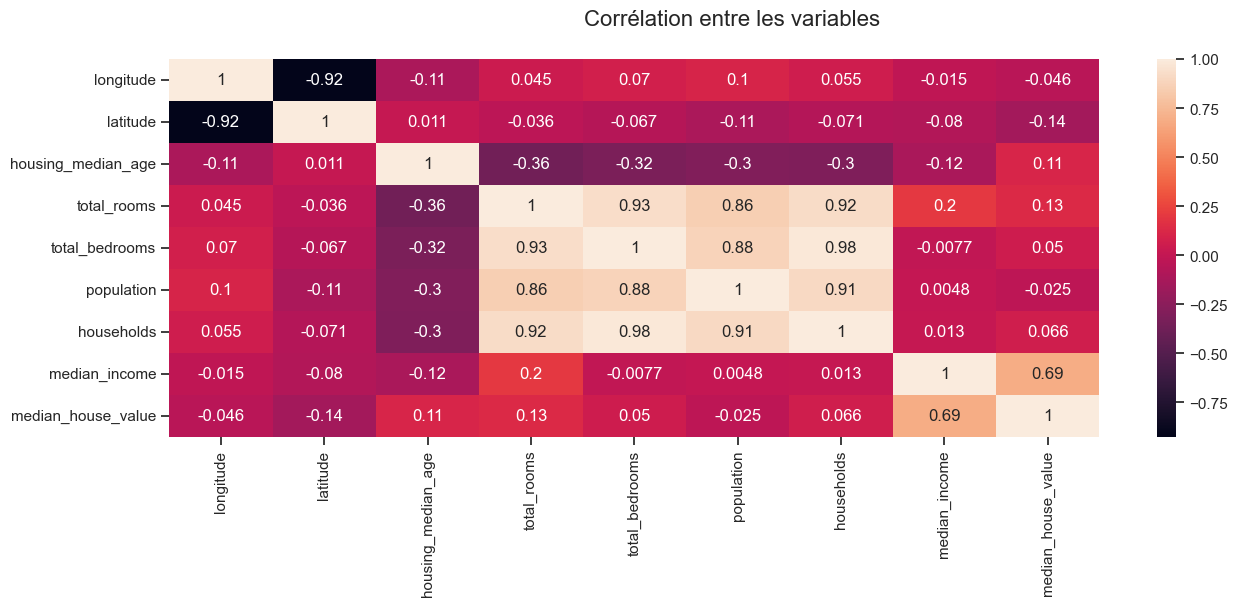

In [ ]:
##on utilise data.corr et le heatmap de seborn
corr_df = data.corr()
print("CORR ------------------")
#print(corr_df, "\n")
figure, ax = color_graph_background(1,1)
figure.set_size_inches(15, 5, forward=True)
figure.set_dpi(100)
figure.suptitle("Corrélation entre les variables", fontsize=16)
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
correlation_target = data.corr()
correlation_target[target].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [ ]:
cols = get_numeric_columns_names(data)
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

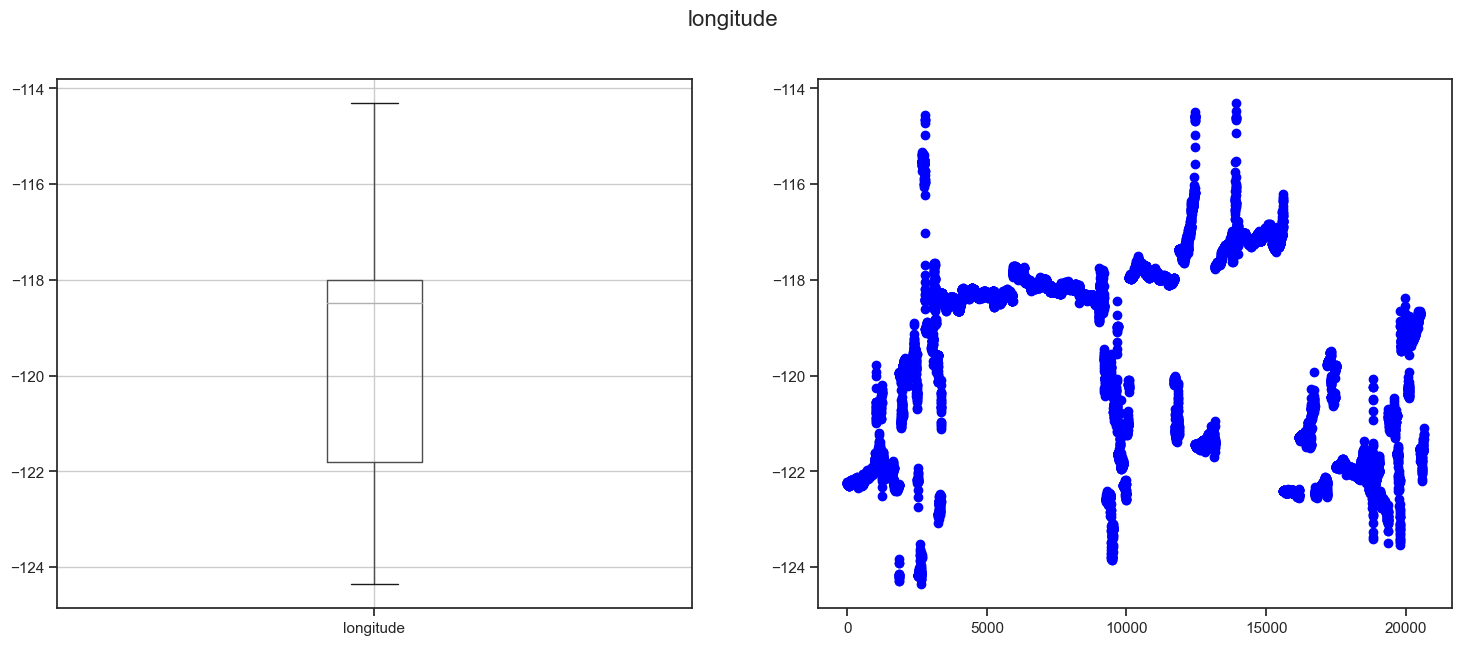

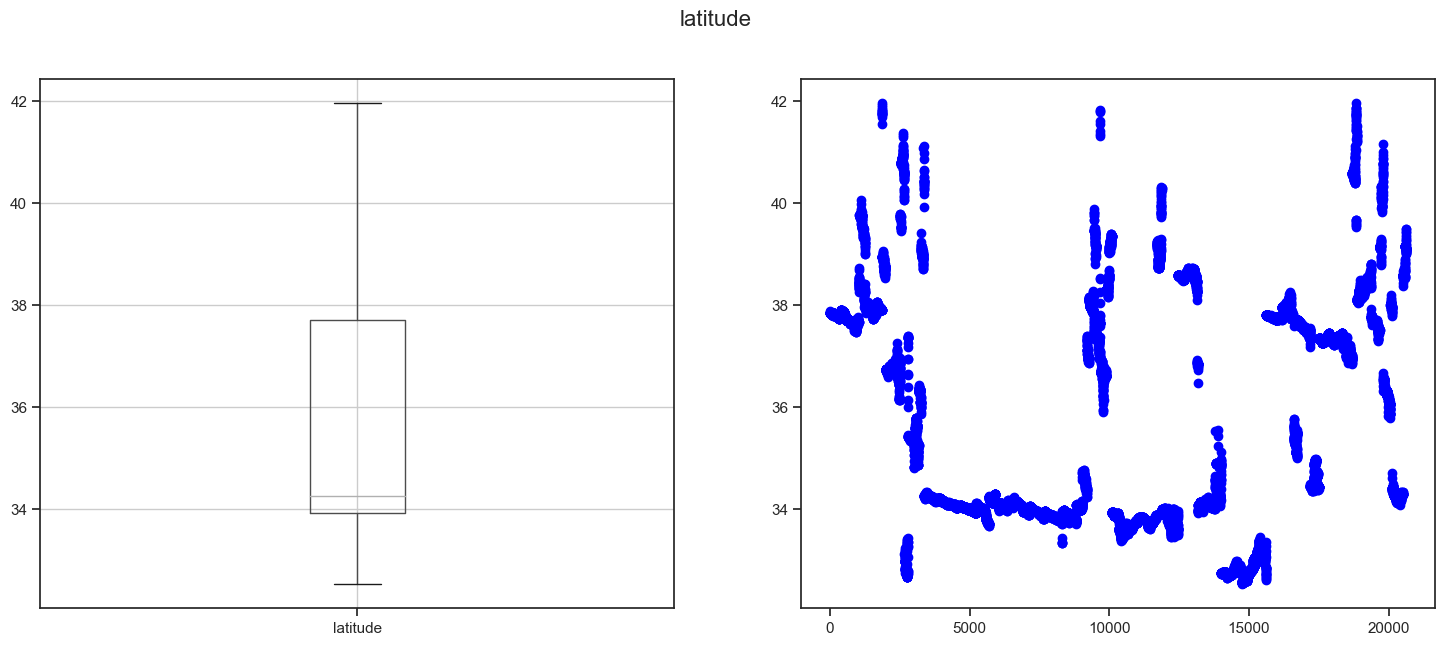

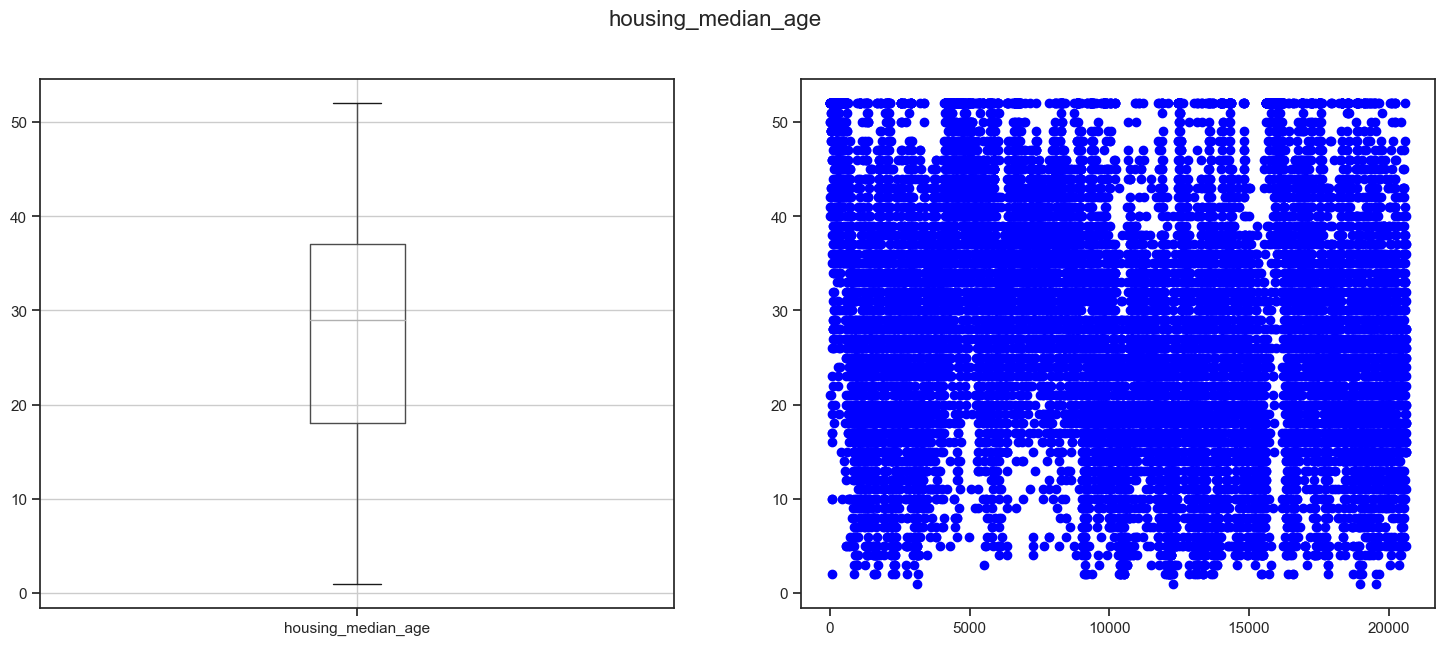

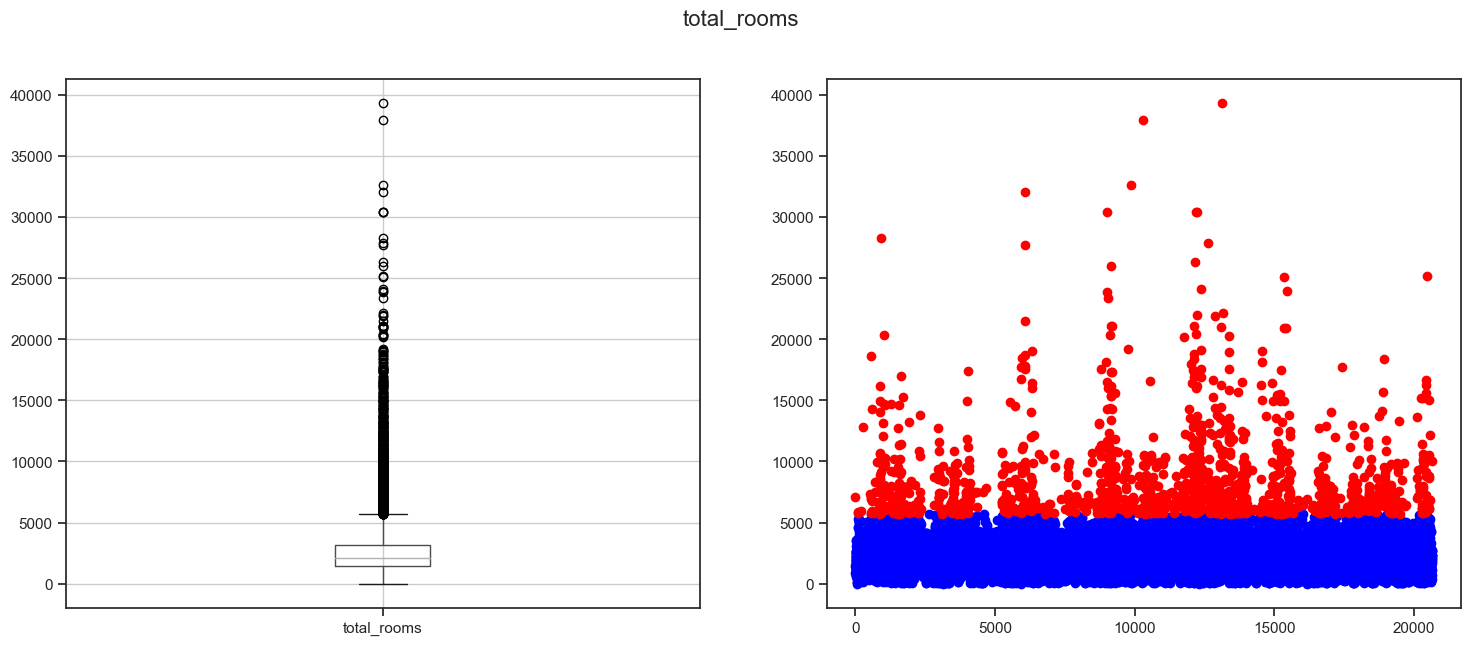

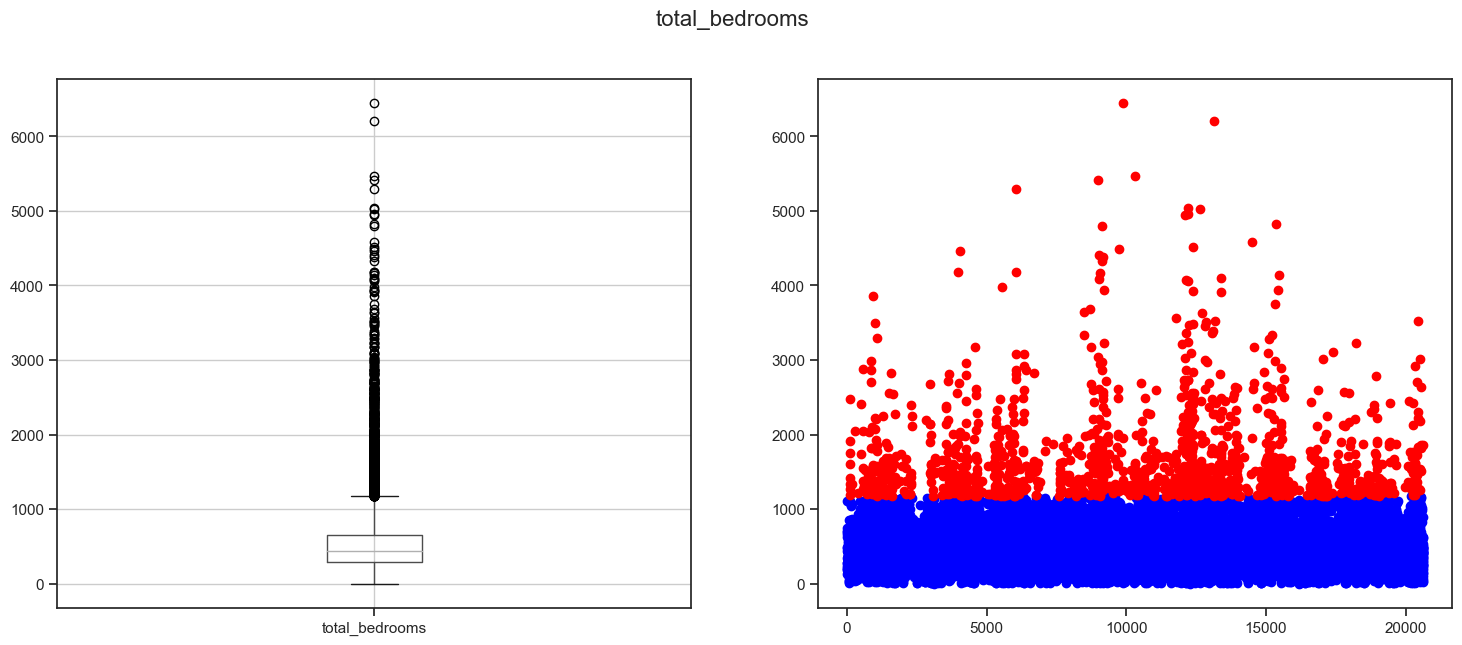

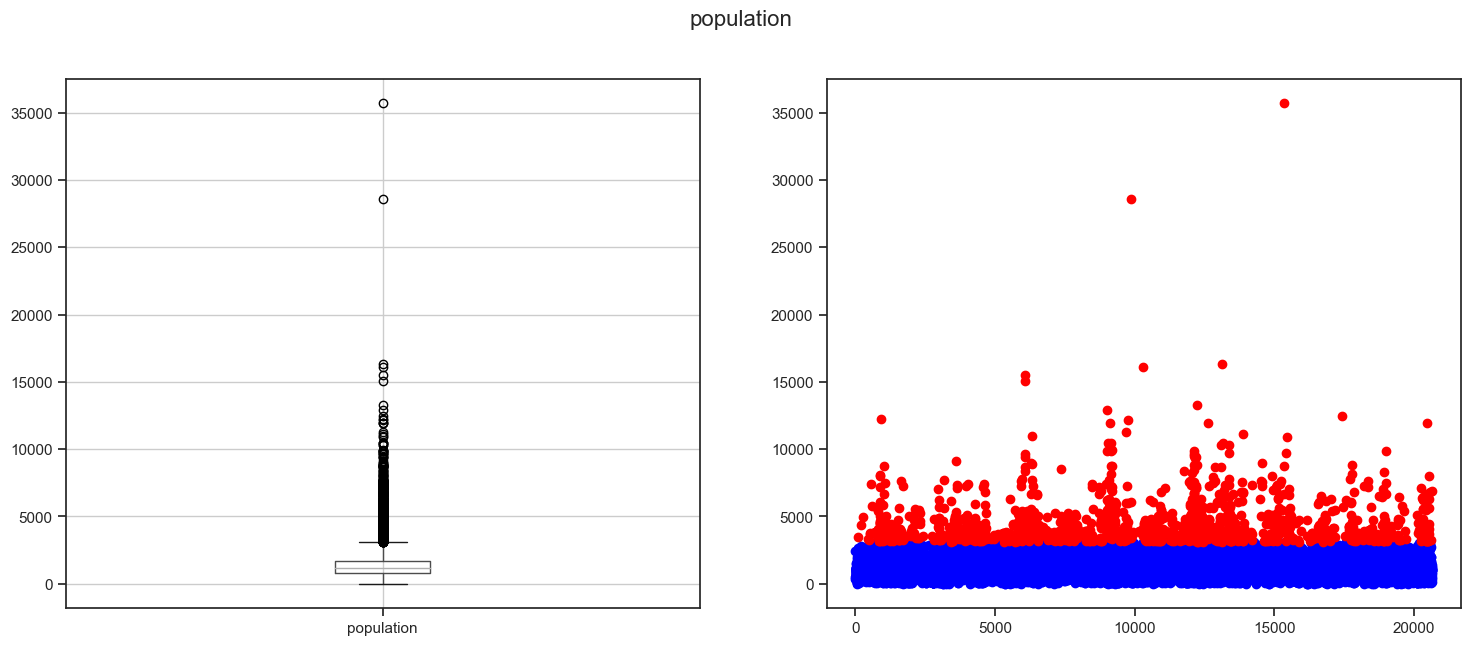

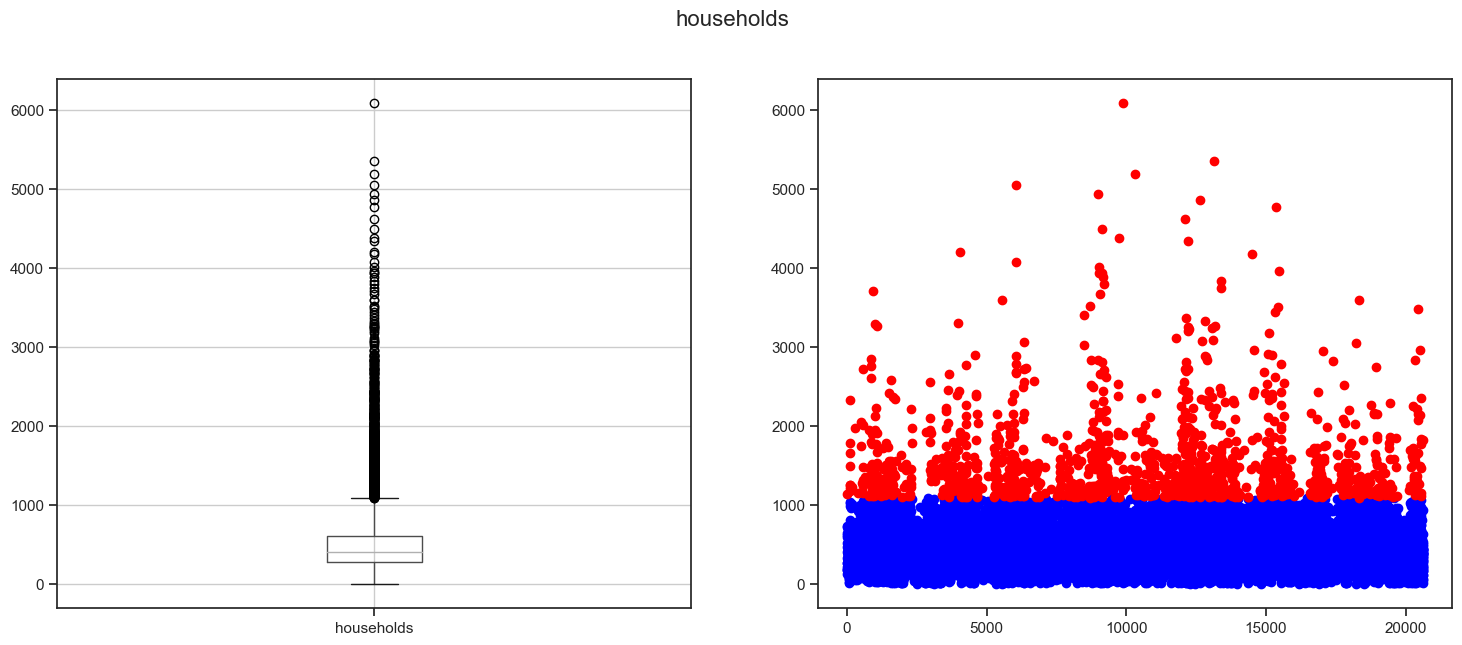

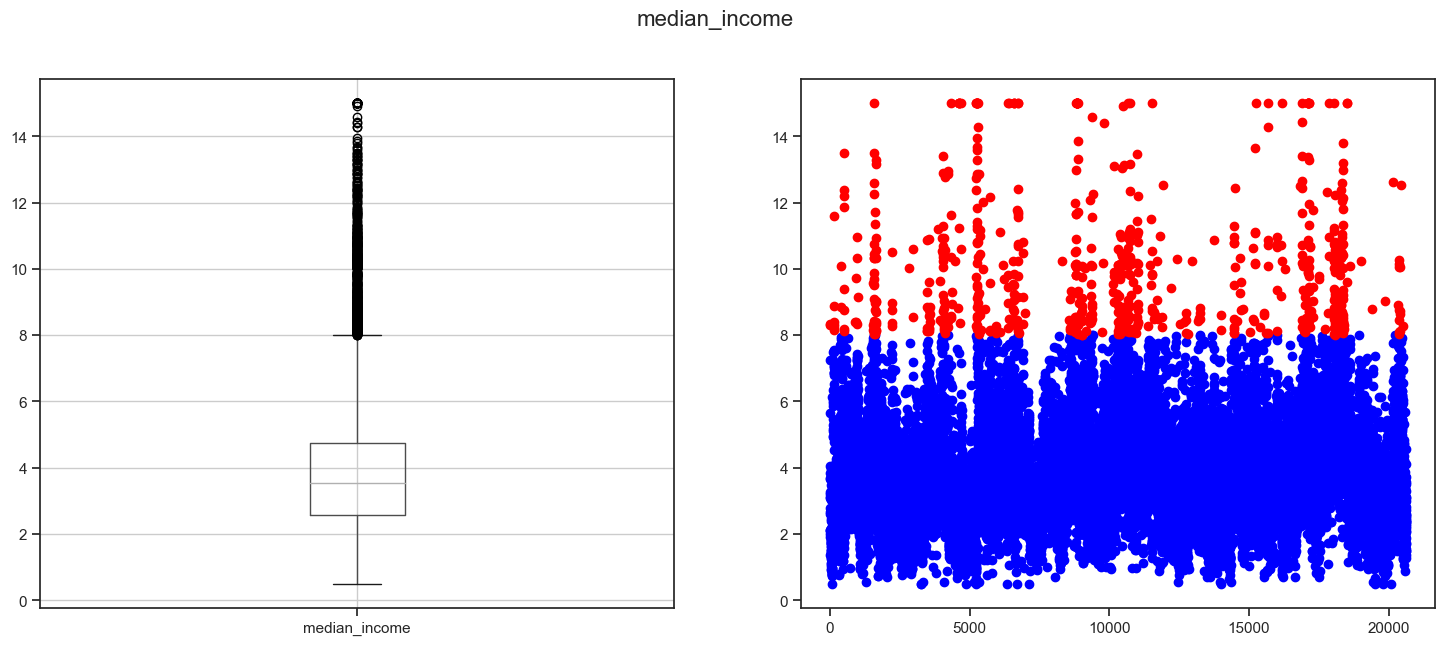

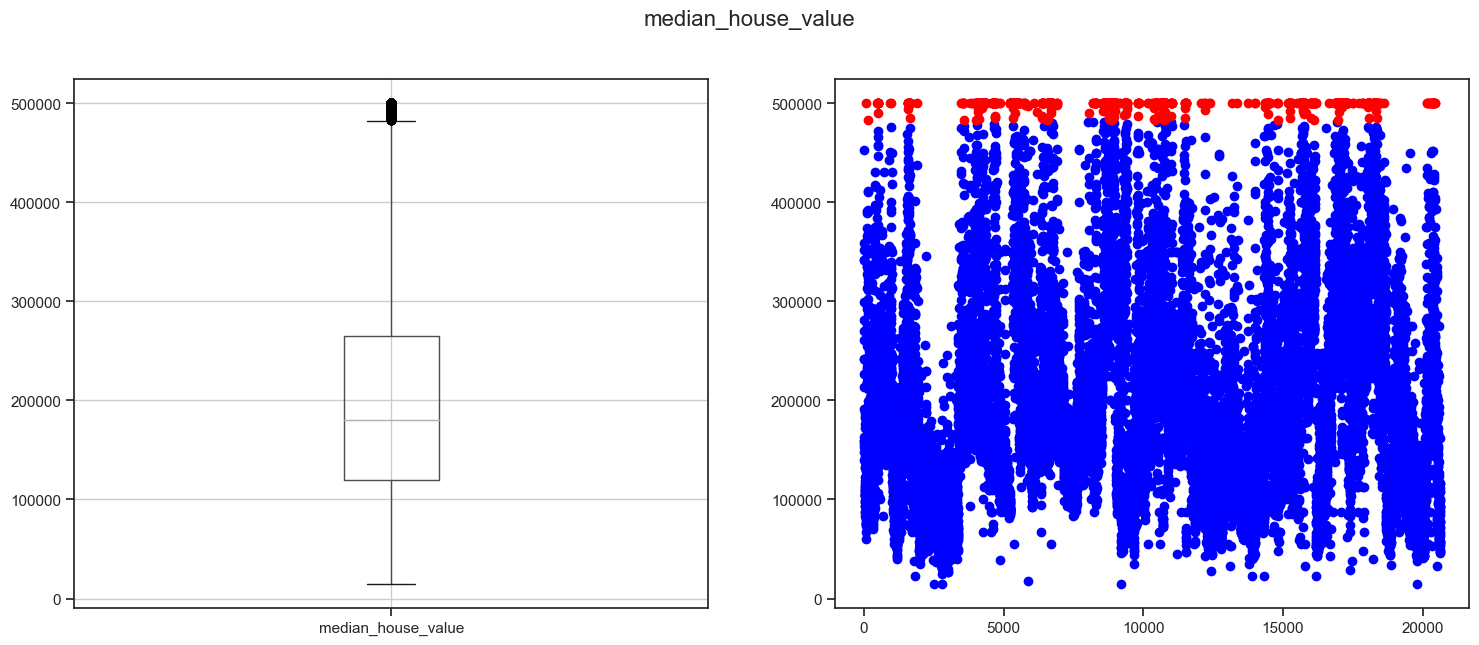

In [ ]:
for column_name in cols:
    q_low, q_hi,iqr, q_min, q_max = get_outliers_datas(data, column_name)
    graphe_outliers(data, column_name, q_min, q_max)

Dans un premier temps pas de décision sur le traitement outliers

C:\Program Files\Python39\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

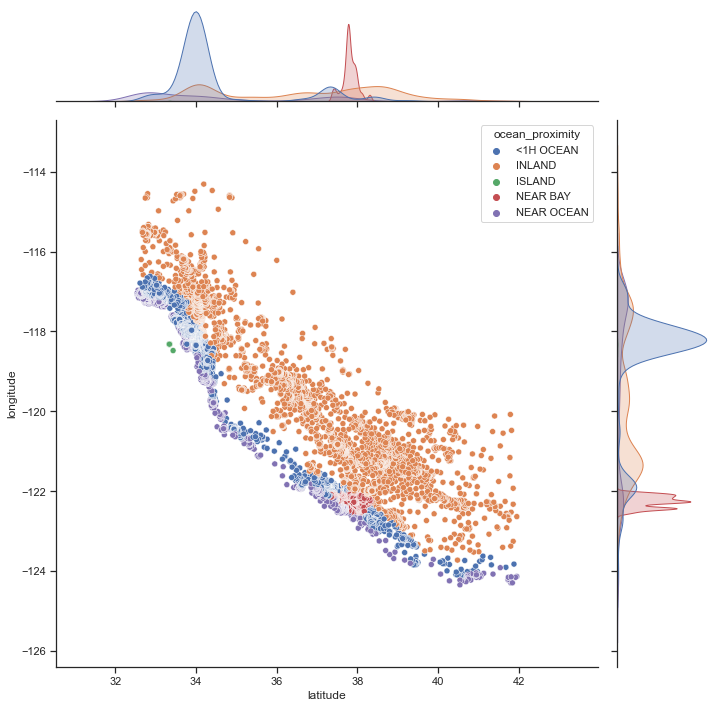

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(data=data, x="latitude",y="longitude", hue="ocean_proximity",size=10)
plt.ylabel("longitude")
plt.xlabel("latitude")
plt.show()
sns.despine

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

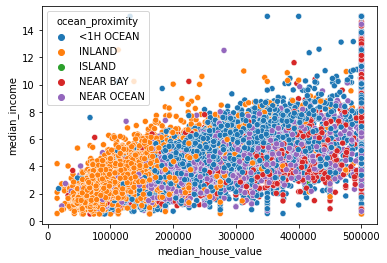

In [ ]:
sns.scatterplot(data=data, x="median_house_value", y="median_income", hue="ocean_proximity")

C:\Program Files\Python39\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

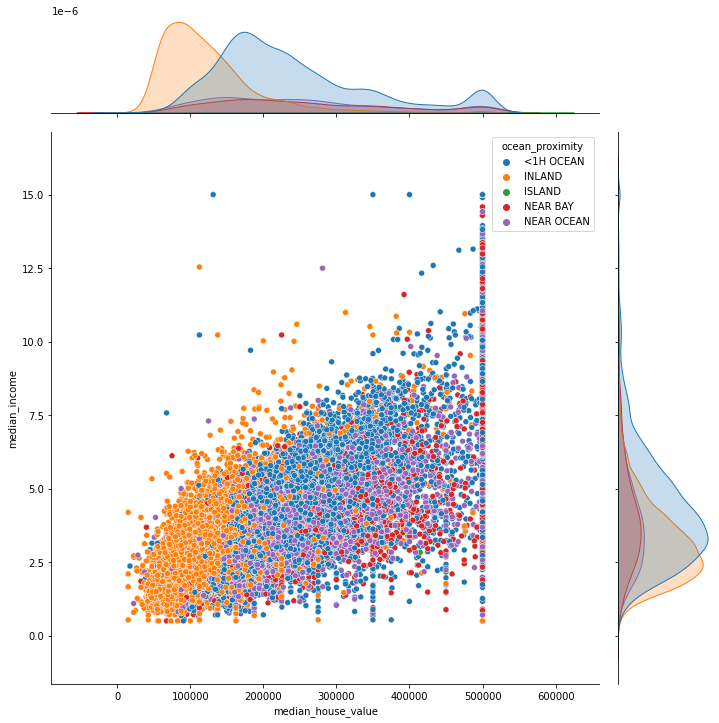

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(data=data, x="median_house_value",y="median_income", hue="ocean_proximity",size=10)
plt.ylabel("median_income")
plt.xlabel("median_house_value")
plt.show()
sns.despine

## Mapping

In [ ]:
california_img=mpimg.imread(file_path+'california.png')

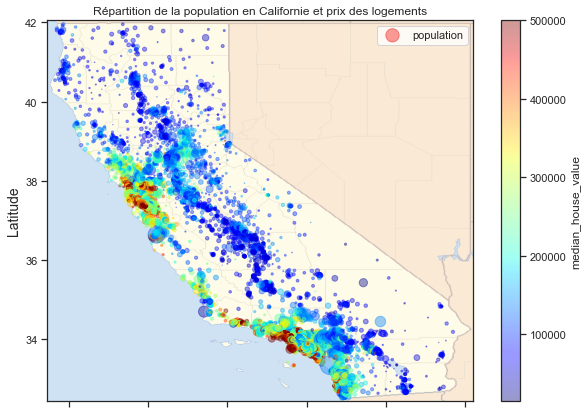

In [ ]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
				s=data['population']/100, label='population', figsize=(10,7),
				c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.title("Répartition de la population en Californie et prix des logements")
plt.show()

In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

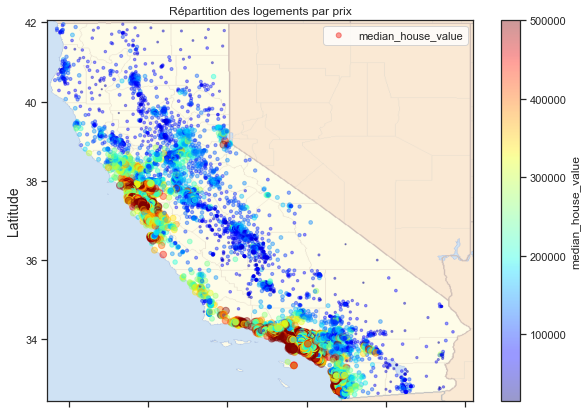

In [ ]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
				s=data['median_house_value']/10000, label='median_house_value', figsize=(10,7),
				c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.title("Répartition des logements par prix")
plt.show()

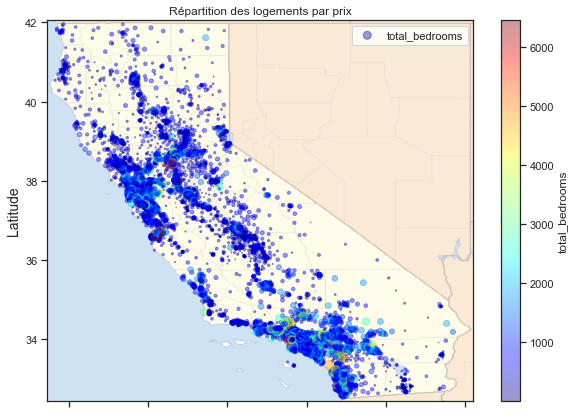

In [ ]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
				s=data['total_bedrooms']/50, label='total_bedrooms', figsize=(10,7),
				c='total_bedrooms', cmap=plt.get_cmap('jet'), colorbar=True)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.title("Répartition des logements par prix")
plt.show()

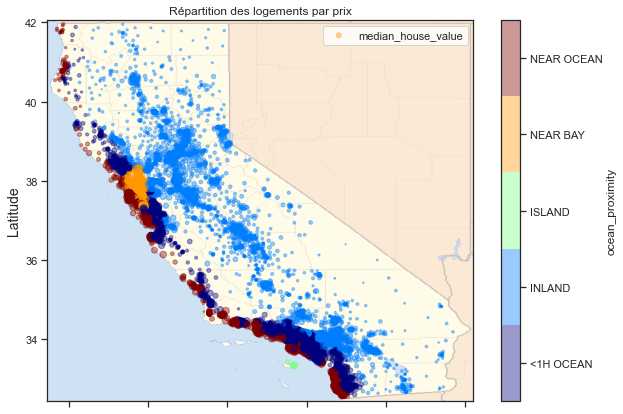

In [ ]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
				s=data['median_house_value']/10000, label='median_house_value', figsize=(10,7),
				c='ocean_proximity', cmap=plt.get_cmap('jet'), colorbar=True)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.title("Répartition des median_house_value")
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap
map_hooray = folium.Map(location=[36.7783,-119.4179],
                    zoom_start = 6, min_zoom=5) 

df = data[['latitude', 'longitude']]
data_temp = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]
HeatMap(data_temp, radius=10).add_to(map_hooray)
map_hooray


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

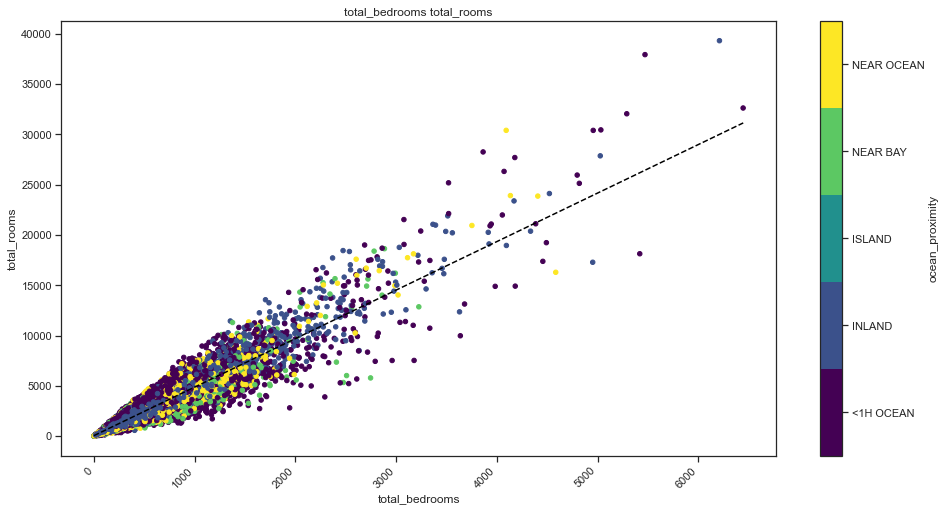

In [ ]:
df_temp = data.dropna(axis=0)
draw_regression2(df_temp, 'total_bedrooms', 'total_rooms', 'ocean_proximity')

In [ ]:
colors = {'<1H OCEAN':'#440154', 'INLAND':'#3B518B', 'NEAR OCEAN':'#FDE725', 'NEAR BAY':'#5CC863', 'ISLAND':'#21908D'}

def draw_regression_3d2(df, col_x, col_y, col_z, col_group=None, colors=None): 
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111, projection = '3d')

    # Pour faciliter la visualisation, on va changer la valeur de l'arrondissement (10)
    tmp_arr = df[col_z][:]
    c = list(colors.keys())
    p = None
    if col_group is None:
        p = ax.scatter(tmp_arr, df[col_x], df[col_y], c=tmp_arr, cmap="viridis")
    else:
        # df['continent'].map(colors)
        ax.scatter(tmp_arr, df[col_x], df[col_y], c=df[col_group].map(colors))
 
    ax.set_xlabel(col_x)
    ax.set_ylabel(col_y)
    ax.set_zlabel(col_z)
    if p is not None:
        fig.colorbar(p)
    plt.title(col_x + ", " + col_y + ", "+col_z)

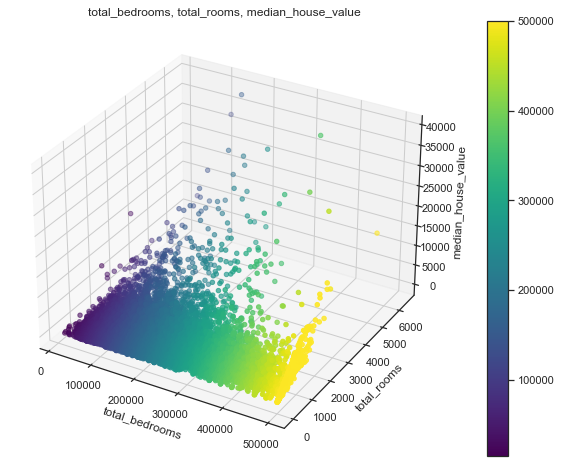

In [ ]:
draw_regression_3d2(df_origin, 'total_bedrooms', 'total_rooms', 'median_house_value', colors=colors)
plt.show()

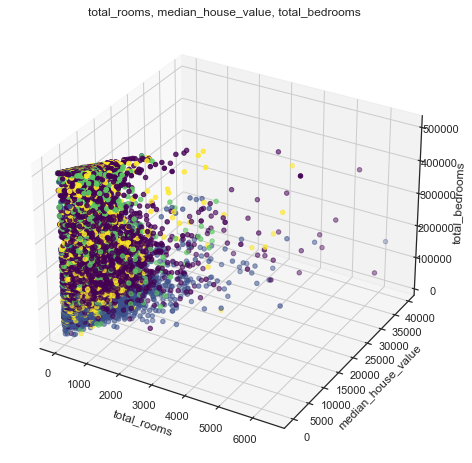

In [ ]:
draw_regression_3d2(df_origin, 'total_rooms','median_house_value', 'total_bedrooms', 'ocean_proximity', colors)

# 3. Pre-processing

1. Création du train set / test set
1. Elimination des NaN : dropna(), imputation, colonnes "vides"
1. Encodage
1. Suppression des outliers néfastes au modèle => ce qui veut dire après la 1ère itération
1. Feature Selection

Total_bedrooms column a 207 NAN, que nous devons imputer

## 3.1. Codification de ```'ocean_proximity'```
Codification de l'emplacement ```'ocean_proximity'``` pour faire une régression linéaire et remplacer les NAN du nombre de chambres

In [ ]:
data.shape

(20640, 10)

In [ ]:
encoder = OneHotEncoder(sparse=False)
transformed = encoder.fit_transform(data[['ocean_proximity']])
transformed

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
data.shape

(20640, 10)

In [ ]:
#Create a Pandas DataFrame of the hot encoded column
ohe_df = pd.DataFrame(transformed, columns=encoder.get_feature_names_out())
print("ohe_df:", ohe_df.shape, "data:", data.shape)

ohe_df: (20640, 5) data: (20640, 10)


In [ ]:
#concat with original data
data_encode = pd.concat([data, ohe_df], axis=1)
print("ohe_df:", ohe_df.shape, "data:", data.shape, "data_encode:", data_encode.shape)
data_encode.head()

ohe_df: (20640, 5) data: (20640, 10) data_encode: (20640, 15)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       1.0                         0.0  
1                       1.0                         0.0  
2                       1.0                         0.0  
3                       1.0                         0.0  
4                       1.0                         0.0

## 3.2. Imputation de ```'total_bedrooms'```
Faire une régression linéaire pour estimer le nombre de chambre

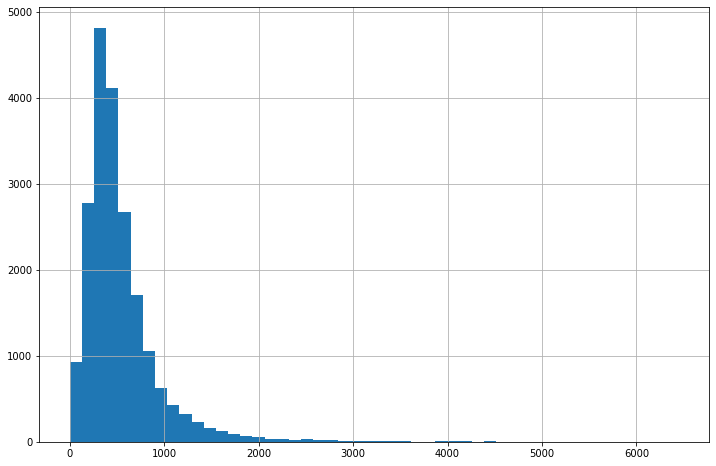

In [ ]:
total_bedroms = data[data["total_bedrooms"].notnull()]["total_bedrooms"]
total_bedroms.hist(figsize=(12,8),bins=50)
plt.show()

In [ ]:
data_encode.isna().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity                 0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [ ]:
data_encode.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
data_encode.shape

(20640, 15)

In [ ]:
data_encode["bed_room_on_total_room"] = data_encode['total_bedrooms']

In [ ]:
X = data_encode.loc[data_encode['bed_room_on_total_room'].notna(),['total_rooms']]
y = data_encode.loc[data_encode['bed_room_on_total_room'].notna(),['total_bedrooms']]

X_pred = data_encode.loc[(data_encode['bed_room_on_total_room'].isna()),['total_rooms']]

0.8686059335467704


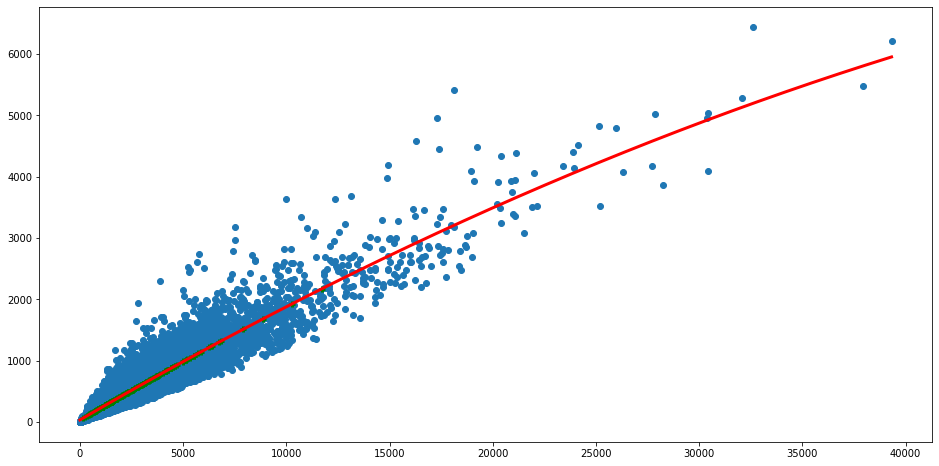

In [ ]:
pf=PolynomialFeatures(degree=2,include_bias=False)
Xpf= pf.fit_transform(X)

linreg = LinearRegression()
linreg.fit(Xpf,y)
print(linreg.score(Xpf, y))

X_new = np.linspace(min(X.values), max(X.values), X.shape[0]).reshape(len(X), 1)
X_newPoly = pf.fit_transform(X_new)
y_new = linreg.predict(X_newPoly)

X_pred_poly = pf.fit_transform(X_pred)
y_pred2 = linreg.predict(X_pred_poly)

figure, axe = color_graph_background(1,1)
axe.scatter(X, y)
axe.plot(X_new, y_new, c='r', lw=3)
axe.scatter(X_pred, y_pred2, c='g', marker='+', lw=3)
figure.set_size_inches(16, 8, forward=True)


Affectation du nombre chambre par rapport aux prédictions

In [ ]:
X_pred["y_pred"] = y_pred2
data_encode.loc[X_pred.index, 'bed_room_on_total_room'] = round(X_pred["y_pred"], 0)
data_encode.iloc[X_pred.index]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
290          NEAR BAY                        0.0                     0.0   
341          NEAR BAY                        0.0                     0.0   
538          NEAR BAY                        0.0                     0.0   
563          NEAR BAY                        0.0                     0.0   
696          NEAR BAY                        0.0                     0.0   
...               ...                        ...                     ...   
20267      NEAR OCEAN                        0.0                     0.0   
20268      NEAR OCEAN                        0.0                     0.0   
20372       <1H OCEAN                        1.0                     0.0   
20460       <1H OCEAN                        1.0                     0.0   
20484       <1H OCEAN                        1.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
290                       0.0                       1.0   
341                       0.0                       1.0   
538                       0.0                       1.0   
563                       0.0                       1.0   
696                       0.0                       1.0   
...                       ...                       ...   
20267                     0.0                       0.0   
20268                     0.0                       0.0   
20372                     0.0                       0.0   
20460                     0.0                       0.0   
20484                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  bed_room_on_total_room  
290                           0.0                   279.0  
341                           0.0                   228.0  
538                           0.0                  1014.0  
563                           0.0                   208.0  
696                           0.0                   180.0  
...                           ...                     ...  
20267                         1.0                   729.0  
20268                         1.0                   497.0  
20372                         0.0                   849.0  
20460              

Faire une régression polynomiale avec plusieurs critères, car total_bedroom est très corrélée aux features :
* ```'total_rooms'```
* ```'households'```
* ```'population'```

In [ ]:
data_encode["total_rooms_formula"] = data['total_bedrooms']
data_encode["total_rooms_formula"].isna().sum()

207

In [ ]:
data_encode.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'bed_room_on_total_room', 'total_rooms_formula'],
      dtype='object')

In [ ]:
mask = data_encode["total_rooms_formula"].notnull()

lr = smf.ols(formula='total_rooms_formula ~ total_rooms + households + population',
             data=data_encode.loc[mask,:]).fit()

In [ ]:
data_encode.loc[~mask, 'total_rooms_formula'] = round(lr.predict(data_encode.loc[~mask,:].drop(columns=['total_rooms_formula'])),0)
data_encode.isnull().sum()



longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity                 0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
bed_room_on_total_room          0
total_rooms_formula             0
dtype: int64

In [ ]:
data_encode.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'bed_room_on_total_room', 'total_rooms_formula'],
      dtype='object')

In [ ]:
data_encode.loc[data_encode['total_rooms_formula'] != data_encode['bed_room_on_total_room'], [ 'total_rooms',
       'total_bedrooms', 'population', 'households', 'bed_room_on_total_room', 'total_rooms_formula']]

total_rooms  total_bedrooms  population  households  \
290         1256.0             NaN       570.0       218.0   
341          992.0             NaN       732.0       259.0   
538         5154.0             NaN      3741.0      1273.0   
563          891.0             NaN       384.0       146.0   
696          746.0             NaN       387.0       161.0   
...            ...             ...         ...         ...   
20267       3620.0             NaN      3171.0       779.0   
20268       2393.0             NaN      1938.0       762.0   
20372       4260.0             NaN      1701.0       669.0   
20460       5512.0             NaN      2734.0       814.0   
20484       3051.0             NaN      1705.0       495.0   

       bed_room_on_total_room  total_rooms_formula  
290                     279.0                241.0  
341                     228.0                265.0  
538                    1014.0               1304.0  
563                     208.0                164.0  
696                     180.0                172.0  
...                       ...                  ...  
20267                   729.0                787.0  
20268                   497.0                763.0  
20372                   849.0                756.0  
20460                  1080.0                911.0  
20484                   622.0                541.0  

[206 rows x 6 columns]

In [ ]:
data_encode["bed_room_delta"] = data_encode['total_rooms_formula'] - data_encode['bed_room_on_total_room']
data_encode["bed_room_delta"].mean()

0.17727713178294574

In [ ]:
data_encode[data_encode["bed_room_delta"]!=0]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
290          NEAR BAY                        0.0                     0.0   
341          NEAR BAY                        0.0                     0.0   
538          NEAR BAY                        0.0                     0.0   
563          NEAR BAY                        0.0                     0.0   
696          NEAR BAY                        0.0                     0.0   
...               ...                        ...                     ...   
20267      NEAR OCEAN                        0.0                     0.0   
20268      NEAR OCEAN                        0.0                     0.0   
20372       <1H OCEAN                        1.0                     0.0   
20460       <1H OCEAN                        1.0                     0.0   
20484       <1H OCEAN                        1.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
290                       0.0                       1.0   
341                       0.0                       1.0   
538                       0.0                       1.0   
563                       0.0                       1.0   
696                       0.0                       1.0   
...                       ...                       ...   
20267                     0.0                       0.0   
20268                     0.0                       0.0   
20372                     0.0                       0.0   
20460                     0.0                       0.0   
20484                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  bed_room_on_total_room  \
290                           0.0                   279.0   
341                           0.0                   228.0   
538                           0.0                  1014.0   
563                           0.0                   208.0   
696                           0.0                   180.0   
...                           ...                     ...   
20267                         1.0                   729.0   
20268                         1.0                   497.0   
20372                         0.0                   849.0   
20460    

In [ ]:
data_encode["bed_room_on_poly2"] = data_encode['total_bedrooms']

In [ ]:
X = data_encode.loc[data_encode['bed_room_on_poly2'].notna(),['total_rooms', 'population', 'households']]
y = data_encode.loc[data_encode['bed_room_on_poly2'].notna(),['total_bedrooms']]

X_pred = data_encode.loc[(data_encode['bed_room_on_poly2'].isna()),['total_rooms', 'population', 'households']]

In [ ]:
pf=PolynomialFeatures(degree=2,include_bias=False)
Xpf= pf.fit_transform(X)

linreg = LinearRegression()
linreg.fit(Xpf,y)
print(linreg.score(Xpf, y))

X_pred_poly = pf.fit_transform(X_pred)
y_pred2 = linreg.predict(X_pred_poly)

X_pred["y_pred"] = y_pred2
data_encode.loc[X_pred.index, 'bed_room_on_poly2'] = round(X_pred["y_pred"], 0)
data_encode.iloc[X_pred.index]


0.9785708466923002


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
290          NEAR BAY                        0.0                     0.0   
341          NEAR BAY                        0.0                     0.0   
538          NEAR BAY                        0.0                     0.0   
563          NEAR BAY                        0.0                     0.0   
696          NEAR BAY                        0.0                     0.0   
...               ...                        ...                     ...   
20267      NEAR OCEAN                        0.0                     0.0   
20268      NEAR OCEAN                        0.0                     0.0   
20372       <1H OCEAN                        1.0                     0.0   
20460       <1H OCEAN                        1.0                     0.0   
20484       <1H OCEAN                        1.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
290                       0.0                       1.0   
341                       0.0                       1.0   
538                       0.0                       1.0   
563                       0.0                       1.0   
696                       0.0                       1.0   
...                       ...                       ...   
20267                     0.0                       0.0   
20268                     0.0                       0.0   
20372                     0.0                       0.0   
20460                     0.0                       0.0   
20484                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  bed_room_on_total_room  \
290                           0.0                   279.0   
341                           0.0                   228.0   
538                           0.0                  1014.0   
563                           0.0                   208.0   
696                           0.0                   180.0   
...                           ...                     ...   
20267                         1.0                   729.0   
20268                         1.0                   497.0   
20372                         0.0                   849.0   
20460    

In [ ]:
data_encode["toto"] = data_encode['bed_room_on_poly2'] - data_encode['total_rooms_formula']
data_encode[data_encode["toto"]!=0]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
738      -122.14     37.67                37.0       3342.0             NaN   
1097     -121.77     39.66                20.0       3759.0             NaN   
...          ...       ...                 ...          ...             ...   
20125    -118.80     34.41                45.0       1610.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
738        1635.0       557.0         4.7933            186900.0   
1097       1705.0       600.0         4.7120            158600.0   
...           ...         ...            ...                 ...   
20125      1148.0       347.0         2.7000            120400.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
538          NEAR BAY                        0.0                     0.0   
563          NEAR BAY                        0.0                     0.0   
696          NEAR BAY                        0.0                     0.0   
738          NEAR BAY                        0.0                     0.0   
1097           INLAND                        0.0                     1.0   
...               ...                        ...                     ...   
20125       <1H OCEAN                        1.0                     0.0   
20268      NEAR OCEAN                        0.0                     0.0   
20372       <1H OCEAN                        1.0                     0.0   
20460       <1H OCEAN                        1.0                     0.0   
20484       <1H OCEAN                        1.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
538                       0.0                       1.0   
563                       0.0                       1.0   
696                       0.0                       1.0   
738                       0.0                       1.0   
1097                      0.0                       0.0   
...                       ...                       ...   
20125                     0.0                       0.0   
20268                     0.0                       0.0   
20372                     0.0                       0.0   
20460                     0.0                       0.0   
20484                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  bed_room_on_total_room  \
538                           0.0                  1014.0   
563                           0.0                   208.0   
696                           0.0                   180.0   
738                           0.0                   677.0   
1097                          0.0                   755.0   
...                           ...                     ...   
20125                         0.0                   347.0   
20268                         1.0                   497.0   
20372                         0.0                   849.0   
20460    

In [ ]:
data_encode["toto"].describe()

count    20640.000000
mean         0.041328
std          4.967249
min        -74.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        581.000000
Name: toto, dtype: float64

Les 3 façons de prédire donnent des résultats différents.     
Comment déterminer laquelle choisir ?    
En prenant la méthode qui a le meilleure score, à savoir Polynomiale avec les 3 colonnes

In [ ]:
data_encode.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'bed_room_on_total_room', 'total_rooms_formula', 'bed_room_delta',
       'bed_room_on_poly2', 'toto'],
      dtype='object')

In [ ]:
data_clean = data_encode[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'bed_room_on_poly2']]

data_clean = data_clean.rename(columns={'bed_room_on_poly2':'total_bedrooms'})
data_clean = data_clean[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
print(data_clean.shape)
data_clean.head()

(20640, 15)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       1.0                         0.0  
1                       1.0                         0.0  
2                       1.0                         0.0  
3                       1.0                         0.0  
4                       1.0                         0.0

In [ ]:
data_clean.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [ ]:
df_origin[df_origin['households']>df_origin['population']]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5342     -118.44     34.04                16.0         18.0             6.0   
11849    -121.00     39.75                 8.0       1116.0           214.0   
19522    -121.00     37.65                17.0        484.0           202.0   

       population  households  median_income  median_house_value  \
5342          3.0         4.0         0.5360            350000.0   
11849        27.0        39.0         2.5893             83000.0   
19522       198.0       204.0         0.6825            187500.0   

      ocean_proximity  
5342        <1H OCEAN  
11849          INLAND  
19522          INLAND

## 3.3. Suppression de valeurs abérrentes
Certains ménages sont suppérieurs à la population, ce qui n'est pas logique.

Suppression des lignes concernées.

In [ ]:
data_clean = data_clean[data_clean['households']<data_clean['population']]
print("Suppression de :", df_origin.shape[0] - data_clean.shape[0], "lignes, soit :",data_clean.shape)

Suppression de : 3 lignes, soit : (20637, 15)


In [ ]:
data_clean[data_clean['total_bedrooms']>data_clean['total_rooms']]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity, ocean_proximity_<1H OCEAN, ocean_proximity_INLAND, ocean_proximity_ISLAND, ocean_proximity_NEAR BAY, ocean_proximity_NEAR OCEAN]
Index: []

## 3.4. Nouvelle matrice de corrélation

CORR ------------------


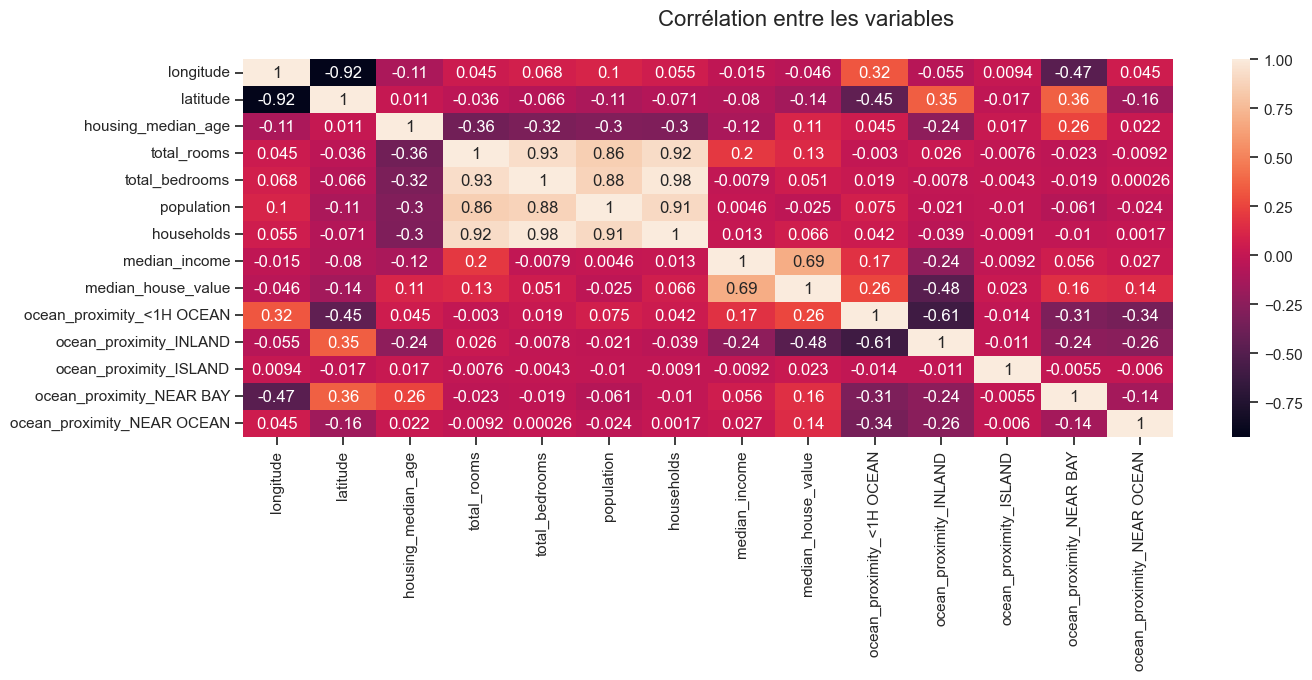

In [ ]:
##on utilise data.corr et le heatmap de seborn
corr_df = data_clean.corr()
print("CORR ------------------")
#print(corr_df, "\n")
figure, ax = color_graph_background(1,1)
figure.set_size_inches(15, 5, forward=True)
figure.set_dpi(100)
figure.suptitle("Corrélation entre les variables", fontsize=16)
sns.heatmap(corr_df, annot=True)
plt.show()

## 3.4. Feature Selection

In [ ]:
data_clean.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20637.000000  20637.000000        20637.000000  20637.000000   
mean    -119.569621     35.631641           28.641663   2636.067839   
std        2.003612      2.135840           12.585084   2181.620627   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1448.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population   households  median_income  \
count    20637.000000  20637.000000  20637.00000   20637.000000   
mean       538.024568   1425.672918    499.60033       3.871049   
std        421.463453   1132.427049    382.32300       1.899667   
min          1.000000      5.000000      1.00000       0.499900   
25%        296.000000    787.000000    280.00000       2.563900   
50%        435.000000   1166.000000    409.00000       3.535000   
75%        647.000000   1725.000000    605.00000       4.743700   
max       6445.000000  35682.000000   6082.00000      15.000100   

       median_house_value  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
count        20637.000000               20637.000000            20637.000000   
mean        206855.820177                   0.442652                0.317343   
std         115396.401844                   0.496712                0.465453   
min          14999.000000                   0.000000                0.000000   
25%         119600.000000                   0.000000                0.000000   
50%         179700.000000                   0.000000                0.000000   
75%         264700.000000                   1.000000                1.000000   
max         500001.000000                   1.000000                1.000000   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
count            20637.000000              20637.000000   
mean                 0.000242                  0.110966   
std                  0.015564                  0.314097   
min                  0.000000                  0.000000   
25%                  0.000000                  0.000000   
50%                  0.000000                  0.000000   
75%                  0.000000                  0.000000   
max                  1.000000                  1.000000   

       ocean_proximity_NEAR OCEAN  
count                20637.000000  
mean                     0.128798  
std                      0.334984  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      0.000000  
max                      1.000000

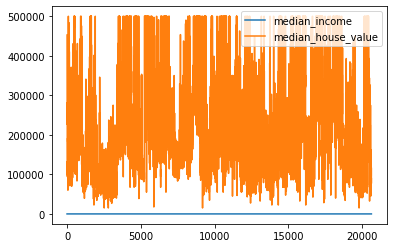

In [ ]:
X = data_clean[[
 'median_income',
 'median_house_value']]

plt.plot(X)
plt.legend(X.columns)

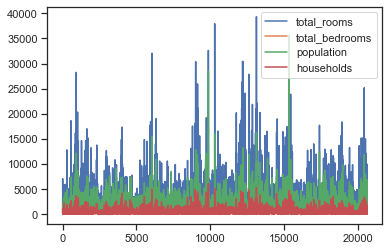

In [ ]:
X = data_clean[[
 'total_rooms',
 'total_bedrooms',
 'population',
 'households']]

plt.plot(X)
plt.legend(X.columns)

In [ ]:
y = data_clean[target]

Liste des colonnes sélectionnés par : SelectFromModel (cf. annexe)

In [ ]:
# Liste des colonnes sélectionnés par : SelectFromModel
selected_columns= ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND' ,'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']
print(selected_columns)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


# 4. Modelling

1. Définir une fonction d'évaluation
1. Entrainement de différents modèles
1. Optimisation avec GridSearchCV
1. (Optionnel) Analyse des erreurs et retour au pre-processing / EDA
1. Learning Curve et prise de décision

In [ ]:
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
try:
    from sklearn.utils._testing import ignore_warnings
except ImportError:
    from sklearn.utils.testing import ignore_warnings
import warnings
from sklearn.exceptions import ConvergenceWarning

In [ ]:
# On prend uniquement les colonnes qui nous intéresse (identifiée précédemment)
X_train, X_test, y_train, y_test = train_test_split(X[selected_columns], y, test_size=0.3, random_state=0)

## 4.1. Recherche manuelle

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
grid_lasso = get_models_regression_lasso(X_train, y_train, verbose=verbose)
score_lasso = grid_lasso.score(X_test, y_test)
print("Lasso score :", score_lasso)

In [ ]:
grid_linear = get_models_regression_linear_grid(X_train, y_train, verbose=verbose)
score_linear = grid_linear.score(X_test, y_test)
print("Linear score :", score_linear)

In [ ]:
grid_logistic = get_models_regression_logistic_grid(X_train, y_train, verbose=verbose)
score_logistic = grid_logistic.score(X_test, y_test)
print("Logistic score :", score_logistic)

In [ ]:
grid_forest = get_models_regression_random_forest(X_train, y_train, verbose=verbose)
score_forest = grid_forest.score(X_test, y_test)
print("Forest score :", score_forest)

In [ ]:
grid_ridge = get_models_regression_ridge_grid(X_train, y_train, verbose=verbose)
score_ridge = grid_ridge.score(X_test, y_test)
print("Ridge score :", score_ridge)

In [ ]:
grid_SGDRegressor = get_models_regression_SGDRegressor_grid(X_train, y_train, verbose=verbose)
score_SGDRegressor = grid_SGDRegressor.score(X_test, y_test)
print("SGDRegressor score :", score_SGDRegressor)

In [ ]:
print("Lasso score :", score_lasso)
print("Linear score :", score_linear)
print("Logistic score :", score_logistic)
print("Forest score :", score_forest)
print("Ridge score :", score_ridge)
print("SGDRegressor score :", score_SGDRegressor)

In [66]:
warnings.filterwarnings("ignore")
@ignore_warnings(category=ConvergenceWarning)
def found_better_config_by_model(X_train, X_test, y_train, y_test, verbose=False):

    # on prend un maximum de colonne pour commencer
    columns_started = list(X_train.columns)
    better_grid_score_dic = {}
    better_grid_equals = {}
    ever_test = []
    
    # Modifier l'ordre des colonnes pour trouver encore d'autres configurations pertinentes
    # Positionnement de 6 suite aux tests lancés et des premiers résultats
    for subset in itertools.permutations(columns_started, 6):
        columns = list(subset)
            
        # a chaque tour, on regardera le meilleur score
        while len(columns)>0:
            str_col = str(sorted(columns))
            if str_col not in ever_test:
                grid_dic = get_models_grid(X_train[columns], y_train)
                for model_name,grid in grid_dic.items():
                    score = grid.score(X_test[columns], y_test)

                    model_better_score = better_grid_score_dic.get(model_name, 0)
                    model_grig_res = (grid, score, str_col)
                    if score > model_better_score:
                        model_better_score = score
                        better_grid_equals[model_name] = [model_grig_res]
                        if verbose:
                            print(f"{model_name} New Best :{round(score,2)} de test, {str_col}, {grid.best_params_}")
                    elif score == model_better_score:
                        better_grid_equals[model_name].append(model_grig_res)
                        if verbose:
                            print(f"{model_name} Same Best :{round(score,2)} de test, {str_col}, {grid.best_params_}")

                    better_grid_score_dic[model_name] = model_better_score
                ever_test.append(str_col)
                if verbose>1: print(str_col, "         DONE")
            # On supprime une colonne
            columns.pop()
    
    return better_grid_score_dic, better_grid_equals

In [67]:
better_grid_score_dic, better_grid_equals = found_better_config_by_model(X_train, X_test, y_train, y_test, verbose=True)

In [ ]:
better_grid_score_dic

In [ ]:
better_models = {}
# Affichage des meilleures configurations et colonnes
for k in better_grid_equals.keys():
    v = better_grid_equals[k]
    str_cols = ""
    params = None
    print(k)
    for val in v:
        if val[-1].count(',')> str_cols.count(','):
            str_cols = val[-1]
            params = val[0]
        print(val[-1], end="")
        if isinstance(val[0], GridSearchCV):
            print(val[0].best_params_, end="")
        print("")
    better_models[k] = params,str_cols

## 4.2. Bagging

In [57]:
from sklearn.ensemble import BaggingClassifier

In [92]:
# --- SANS BAGGING
# SGDClassifier : 0.0008074935400516795
# DecisionTreeClassifier : 0.02503229974160207
# KNeighborsClassifier : 0.007267441860465116
# SVR : 0.32338629591676327
# LinearRegression : 0.6375109203895848
# LogisticRegression : 0.047157622739018086
# 
# ---- AVEC BAGGING
# KNeighborsClassifier : 0.023578811369509043
@ignore_warnings(category=ConvergenceWarning)
def found_better_models():
    random_state = 0

    model_list = [
        SGDClassifier(random_state=random_state), 
        DecisionTreeClassifier(random_state=random_state), 
        KNeighborsClassifier(n_neighbors=6, algorithm='brute'), 
        SVR(kernel='linear', gamma = 'auto'), 
        LinearRegression(), 
        LogisticRegression(random_state=random_state),
        StandardScaler(),
        RandomForestClassifier(n_estimators=100,random_state=random_state)
        ]

    i = 0
    for model in model_list :
        i += 1
        print("Bagging",i," => ",model.__class__.__name__,":", end="")
        bagging = BaggingClassifier(base_estimator=model,n_estimators=100)
        bagging.fit(X_train, y_train)
        print(bagging.score(X_test, y_test))

In [91]:
# --- SANS BAGGING
# SGDClassifier : 0.0008074935400516795
# DecisionTreeClassifier : 0.02503229974160207
# KNeighborsClassifier : 0.007267441860465116
# SVR : 0.32338629591676327
# LinearRegression : 0.6375109203895848
# LogisticRegression : 0.047157622739018086
# 
# ---- AVEC BAGGING
# KNeighborsClassifier : 0.023578811369509043

random_state = 0

model_list = [
    SGDClassifier(random_state=random_state), 
    DecisionTreeClassifier(random_state=random_state), 
    KNeighborsClassifier(n_neighbors=2), 
    SVR( kernel = 'linear' , gamma = 'auto'), 
    LinearRegression(), 
    LogisticRegression(random_state=random_state),
    StandardScaler(),
    RandomForestClassifier(n_estimators=100,random_state=random_state)
    ]

i = 0
for model in model_list :
    i += 1
    print("Bagging",i," => ",model.__class__.__name__,":", end="")
    bagging = BaggingClassifier(base_estimator=model,n_estimators=100)
    bagging.fit(X_train, y_train)
    print(bagging.score(X_test, y_test))

SGDClassifier : 0.0008074935400516795
DecisionTreeClassifier : 0.02503229974160207
KNeighborsClassifier : 0.007267441860465116
SVR : 0.32338629591676327
LinearRegression : 0.6375109203895848


C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression : 0.047157622739018086


MemoryError: could not allocate 931397632 bytes

In [ ]:
random_state = 0
model_svr = SVR( kernel = 'linear' , gamma = 'auto')
model_forest = RandomForestClassifier(n_estimators=100,random_state=random_state)

model = BaggingClassifier(base_estimator=model_svr,
                         n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.023578811369509043

# Optimisation du model

In [ ]:
param_grid= {'n_neighbors':np.arange(1,20)}
# {'algorithm': 'brute', 'n_neighbors': 6}

grid = GridSearchCV(KNeighborsRegressor(),param_grid,cv=5)

grid.fit(X_train,y_train)
print(grid.best_score_,grid.best_params_)
model=grid.best_estimator_
model.score(X_test,y_test)

# ARCHIVES--------------------------------------------------

In [70]:
just to fail

SyntaxError: invalid syntax (Temp/ipykernel_8848/693838000.py, line 1)

In [ ]:
# Autre façon d'imputer
imputer = SimpleImputer(missing_values=np.nan, strategy ="median")
imputer.fit(data[["total_bedrooms"]])
data["total_bedrooms"] = imputer.transform(data[["total_bedrooms"]])
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
# Vérification de ce qui a été imputé
data.loc[df_origin["total_bedrooms"].isna(), "total_bedrooms"].value_counts()

435.0    207
Name: total_bedrooms, dtype: int64

Tous les NAN ont été remplacé par 435

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
selector = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
selector.fit(X, y)
selector.estimator_.coef_

array([[-5.07577566e+00,  5.18065646e+00,  5.54248099e+00, ...,
         0.00000000e+00, -3.41075753e-01, -3.97921712e-01],
       [-1.11959840e+01,  2.65806364e+00,  1.16217950e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.08391936e+01, -1.15524198e+01,  3.42778969e+00, ...,
         0.00000000e+00,  2.38254440e-01,  1.69083796e-01],
       ...,
       [-4.60470338e+00,  5.84195153e-01,  5.65774585e+00, ...,
         0.00000000e+00,  0.00000000e+00, -8.77169899e-02],
       [ 2.66183599e+01, -8.87633521e+00,  6.64321839e+01, ...,
         0.00000000e+00,  1.74203021e+00,  1.82498403e+00],
       [ 1.36101777e+02, -2.71710977e+02,  6.23543811e+02, ...,
        -7.01778025e-03,  1.49478719e+00,  2.45131064e+01]])

In [ ]:
print(np.array(numeric_col)[selector.get_support()])

['longitude' 'total_rooms' 'total_bedrooms' 'population' 'households']


## 4.1. Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier


In [ ]:
random_state = 0
# SGDClassifier 0.0008074935400516795
# DecisionTreeClassifier 0.02503229974160207
# KNeighborsClassifier 0.007267441860465116
# SVR 0.32338629591676327
# LinearRegression 0.6375109203895848
# LogisticRegression 0.047157622739018086

# Suppression des models qui ont de petits scores
model_4 = SVR( kernel = 'linear' , gamma = 'auto')
#model_6 = LinearRegression()
model_7 = LogisticRegression(random_state=random_state)
model_8 = RandomForestClassifier(n_estimators=100,random_state=random_state)
model_9 = StandardScaler()

model_0 = VotingClassifier([#('SVR', model_4),
                           # ('LinearRegression', model_6),
                           # ('LogisticRegression', model_7),
                            ('RandomForestClassifier', model_8),
                            ('StandardScaler', model_9)],
                          voting='hard')

for model in (model_4, model_7, model_8,model_9, model_0):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

SVR 0.32338629591676327


C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.047157622739018086


MemoryError: could not allocate 931397632 bytes

In [ ]:
random_state = 0
model_1 = SGDClassifier(random_state=random_state)
model_2 = DecisionTreeClassifier(random_state=random_state)
model_3 = KNeighborsClassifier(n_neighbors=2)
model_4 = SVR( kernel = 'linear' , gamma = 'auto')
model_6 = LinearRegression()
model_7 = LogisticRegression(random_state=random_state)
model_8 = RandomForestClassifier(n_estimators=100,random_state=random_state)
model_9 = StandardScaler()

model_0 = VotingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3),
                            ('SVR', model_4),
                            ('LinearRegression', model_6),
                            ('LogisticRegression', model_7),
                            ('RandomForestClassifier', model_8),
                            ('StandardScaler', model_9)],
                          voting='hard')

for model in (model_1, model_2, model_3, model_4, model_6, model_7, model_8,model_9, model_0):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

SGDClassifier 0.0008074935400516795
DecisionTreeClassifier 0.02503229974160207
KNeighborsClassifier 0.007267441860465116
SVR 0.32338629591676327
LinearRegression 0.6375109203895848


C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.047157622739018086


MemoryError: could not allocate 931397632 bytes

## Selection des features

### 3.4.1. Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
numeric_col = get_numeric_columns_names(data_clean)
numeric_col.remove(target)
numeric_col

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [ ]:
X = data_clean[numeric_col]
X.var(axis=0)

longitude                     4.014463e+00
latitude                      4.561814e+00
housing_median_age            1.583843e+02
total_rooms                   4.759469e+06
total_bedrooms                1.776314e+05
population                    1.282391e+06
households                    1.461709e+05
median_income                 3.608736e+00
ocean_proximity_<1H OCEAN     2.467231e-01
ocean_proximity_INLAND        2.166468e-01
ocean_proximity_ISLAND        2.422363e-04
ocean_proximity_NEAR BAY      9.865713e-02
ocean_proximity_NEAR OCEAN    1.122144e-01
dtype: float64

In [ ]:
selector = VarianceThreshold(threshold=2)
selector.fit(X)
np.array(numeric_col)[selector.get_support()]

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='<U26')

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [ ]:
# Nous devons supprimer les coordonnées
numeric_col_chi2 = numeric_col.copy()
numeric_col_chi2.remove('longitude')
numeric_col_chi2.remove('latitude')
numeric_col_chi2
Xchi2 = X[numeric_col_chi2]
print(Xchi2.shape, y.shape)
chi2(Xchi2, y)
# Tableau 1 score du tests stat, + il est grand, + il y a un lien avec target
# 2ème tableau P values
# Ce tableau est utilisé pour le SelectKBest

(20637, 11) (20637,)


(array([2.31855916e+04, 9.76838916e+06, 1.41213754e+06, 3.98684970e+06,
        1.30328668e+06, 1.17140623e+04, 3.74635519e+03, 6.56532242e+03,
        1.82786698e+03, 4.07900182e+03, 3.99293854e+03]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 8.60199820e-001, 4.40023874e-147,
        1.00000000e+000, 3.80519225e-003, 4.28285920e-002]))

### 3.4.1. SelectKBest

In [ ]:
for i in range(1, (len(numeric_col)+1)):
    selector = SelectKBest(f_classif, k=i)
    selector.fit(X, y)
    #  print(selector.scores_)
    print(i, np.array(numeric_col)[selector.get_support()])

1 ['median_income']
2 ['median_income' 'ocean_proximity_INLAND']
3 ['median_income' 'ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND']
4 ['total_rooms' 'median_income' 'ocean_proximity_<1H OCEAN'
 'ocean_proximity_INLAND']
5 ['latitude' 'total_rooms' 'median_income' 'ocean_proximity_<1H OCEAN'
 'ocean_proximity_INLAND']
6 ['latitude' 'total_rooms' 'median_income' 'ocean_proximity_<1H OCEAN'
 'ocean_proximity_INLAND' 'ocean_proximity_NEAR BAY']
7 ['latitude' 'total_rooms' 'median_income' 'ocean_proximity_<1H OCEAN'
 'ocean_proximity_INLAND' 'ocean_proximity_NEAR BAY'
 'ocean_proximity_NEAR OCEAN']
8 ['latitude' 'total_rooms' 'households' 'median_income'
 'ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_NEAR BAY' 'ocean_proximity_NEAR OCEAN']
9 ['latitude' 'total_rooms' 'population' 'households' 'median_income'
 'ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_NEAR BAY' 'ocean_proximity_NEAR OCEAN']
10 ['latitude' 'total_rooms' 'total_bedroo

### 3.4.2. SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

model_SVR = SVR( kernel = 'linear' , gamma = 'auto')

# Sélection des features pour le model SVR
selector_svr = SelectFromModel(model_SVR, threshold='mean')
selector_svr.fit(X, y)
selector_svr.estimator_.coef_
print(np.array(numeric_col)[selector_svr.get_support()])

['latitude' 'median_income' 'ocean_proximity_<1H OCEAN'
 'ocean_proximity_INLAND']


### 3.4.2. RFECV

Testes les features intéressantes pour le model SVR

In [ ]:
selector_rfecv = RFECV(model_SVR, step=1, min_features_to_select=4, cv=4)
selector_rfecv.fit(X, y)
# print(selector_rfecv.ranking_)
# print(selector_rfecv.cv_results_)
selected_columns= np.array(numeric_col)[selector_rfecv.get_support()]
print(selected_columns)
# colonnes sélectionnées : 
# ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND' ,'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']

['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_NEAR BAY' 'ocean_proximity_NEAR OCEAN']
